# Data Visualization
Let's look at the data going into the meta-analysis, that is, the unthresholded group-level statistical maps (z-maps) for each of the analysis teams.

In [1]:
%matplotlib inline
import functions as fun # functions mostly written by Alexendre Perez
from nistats import thresholding
import numpy as np
import nibabel as nib
import nilearn
from nilearn import masking, plotting
import warnings
warnings.filterwarnings('ignore')

template = nilearn.datasets.load_mni152_template()
affine = template.affine

level = .05
height_control = 'fdr'
cluster_threshold = 1

# brain coordinates for plotting
cut_coords=None

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/importlib/_bootstrap_external.py:922: FutureWarning: Module nipy.labs.utils.routines deprecated, will be removed
  _imp.create_dynamic, spec)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nipy/labs/statistical_mapping.py:15: FutureWarning: Module nipy.labs.glm deprecated, will be removed. Please use nipy.modalities.fmri.glm instead.
  from .glm import glm
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nipy/labs/statistical_mapping.py:16: FutureWarning: Module nipy.labs.group deprecated, will be removed
  from .group.permutation_test import \


200306-14:25:51,497 nipype.utils INFO:
	 Running nipype version 1.3.1 (latest: 1.4.2)


INFO:nipype.utils:Running nipype version 1.3.1 (latest: 1.4.2)


Get the paths for the unthresholded image for each analysis team, for the given hypothesis.

In [2]:
input_dir = '../data-narps/proc/'
image_type='contrast' # options: zscore, contrast, or standard_error
#img_paths = fun.get_data_paths(input_dir=input_dir, image_type=image_type)

img_paths_unthresh = fun.get_data_paths_from_orig('hypo5_unthresh.nii.gz')
img_paths_thresh = fun.get_data_paths_from_orig('hypo5_thresh.nii.gz')

# For now, select the first N studies. 
N_img = 5
img_paths = img_paths[:N_img]
# img_paths_thresh = img_paths_thresh[:N_img]
# img_paths_unthresh = img_paths_unthresh[:N_img]
img_paths = img_paths_unthresh

NameError: name 'img_paths' is not defined

In order to imitate how a real study is done, we should calculate the z-thresholds corrected for multiple comparisons.

In [5]:
fdr_thresholds = [thresholding.map_threshold(path, alpha=.05, height_control='fdr')[1] \
                  for path in img_paths]


[2.5439536571492685,
 2.4298439025868905,
 2.6624679565419687,
 2.697939395903541,
 2.967745608081623,
 2.6228442192067636,
 3.448413610457374,
 inf,
 3.3787908554067148,
 2.725184440611793,
 2.749971628188087,
 2.4808433055867685,
 3.122622013091041,
 2.8386571407308114,
 3.4455201625813974,
 2.657691478728248,
 2.3942205905904306,
 2.4355083405406837,
 inf,
 2.524461030959083,
 2.4343154430379403,
 2.810725688933326,
 2.5520570278157724,
 2.1803629398335946,
 2.588914558716943,
 3.41817569732566,
 inf,
 3.0073838233937753,
 2.992450475691749,
 2.7177071571340097,
 3.054634094237281,
 inf,
 2.586585283278419,
 inf,
 2.836634635924293,
 inf,
 2.772402286528541,
 4.091437816618873,
 inf,
 inf,
 2.9721195697774423,
 2.7527694702138437,
 2.5345497131337655,
 2.4297902584065927,
 inf,
 2.4910972118367685,
 2.977064609526588,
 4.362867832182838,
 2.4144875236787153,
 inf,
 2.7049200534810556,
 2.9816372394551767,
 3.049170318241787,
 2.824599742888404]

Gather the activation peaks from the images that are FDR-thresholded. 

In [6]:
activation_peaks = [fun.get_activations(path, fdr_thresholds[n_path], space='ijk') \
                    for n_path, path in enumerate(img_paths)]

Img ../data-narps/orig/BEWWYWBV_5G9K/hypo5_unthresh.nii.gz contains Nan. Ignored.
Img ../data-narps/orig/YBXXQPUZ_16IN/hypo5_unthresh.nii.gz contains Nan. Ignored.


Store the peaks in a binary image so that we can visualize them on a brain map.

In [7]:
binary_peak_imgs = [fun.peaks_to_binary_image(I, J, K) \
                    for I, J, K in activation_peaks]

### Visualize the raw z-maps, thersholded z-maps, and peak activations
Note that the 'raw' maps actually aren'y completely raw; I used a small threshold so that the template isn't visible. 

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:62: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/opt/miniconda-latest/en

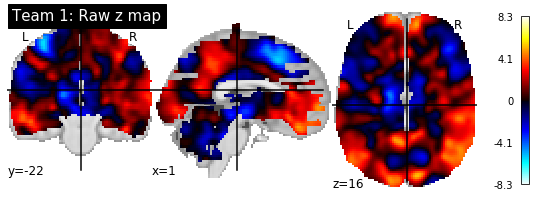

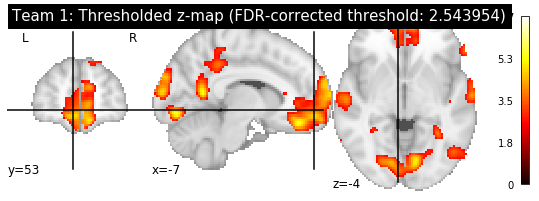

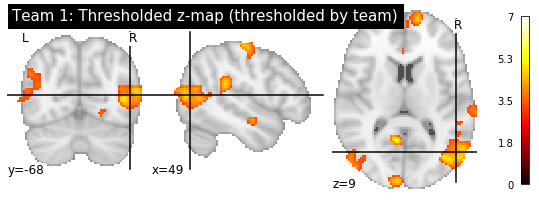

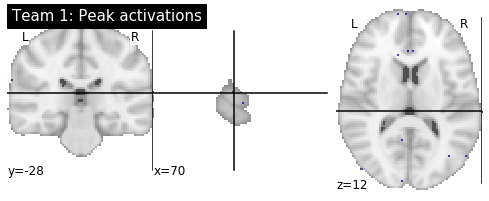

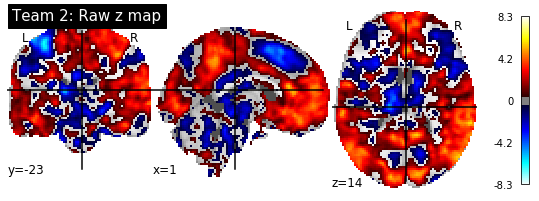

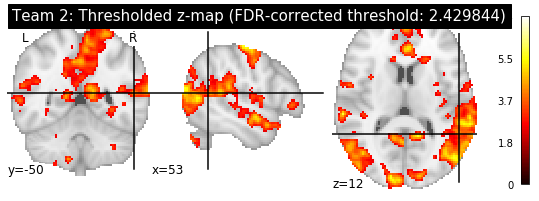

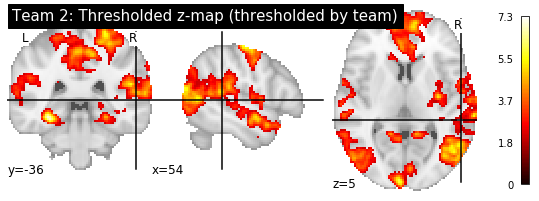

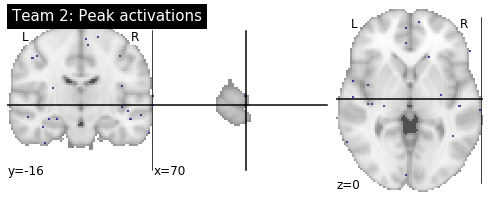

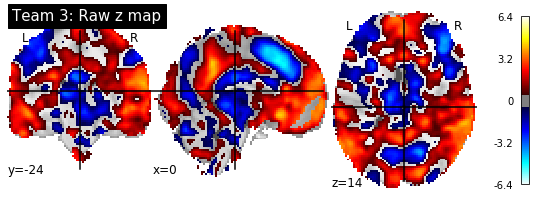

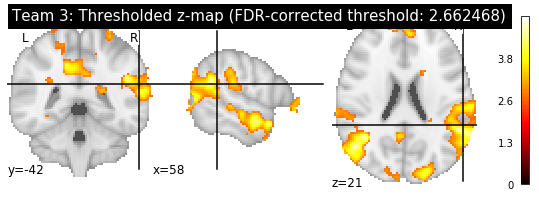

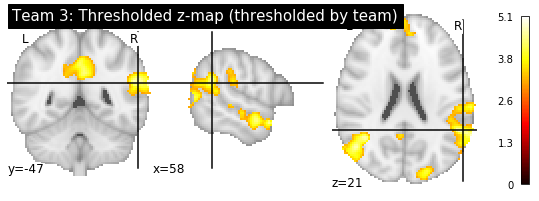

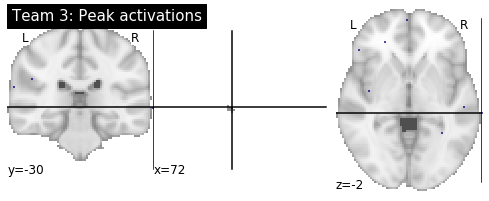

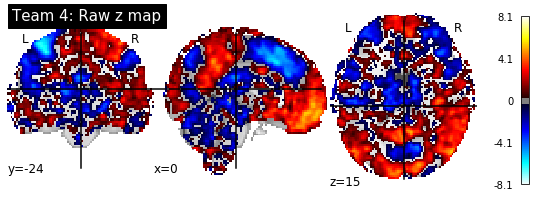

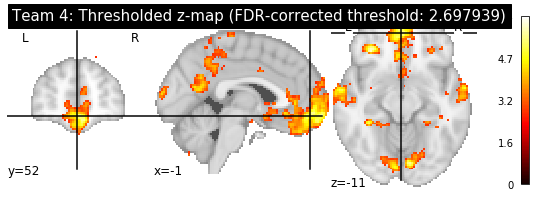

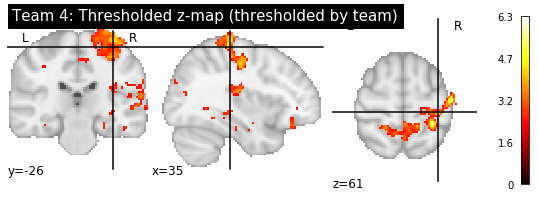

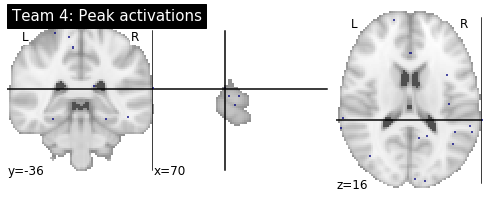

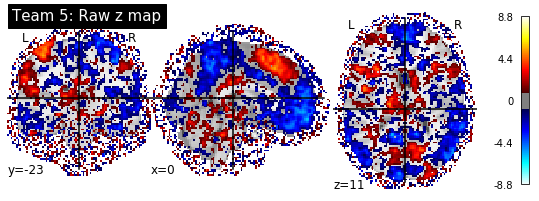

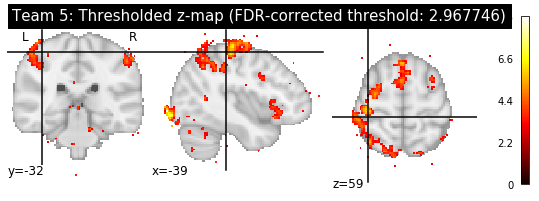

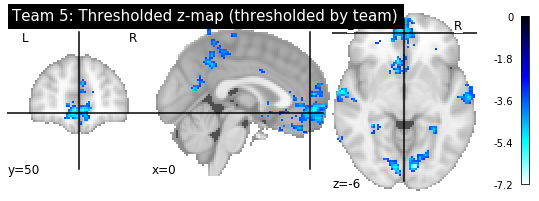

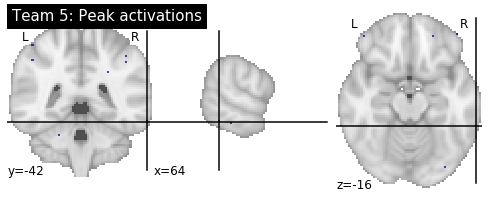

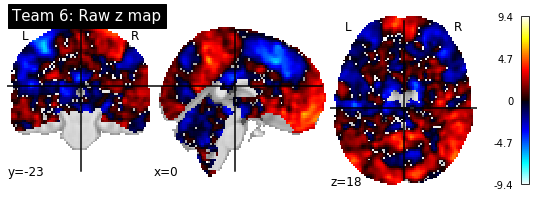

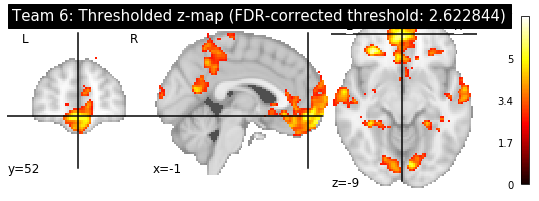

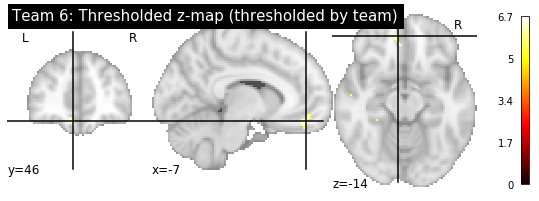

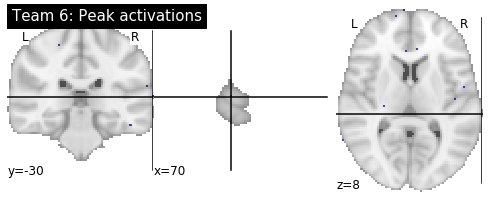

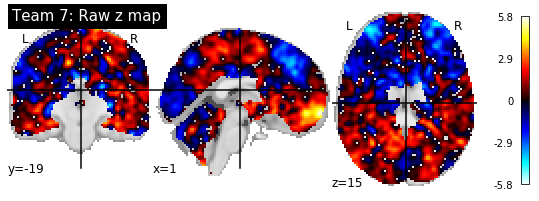

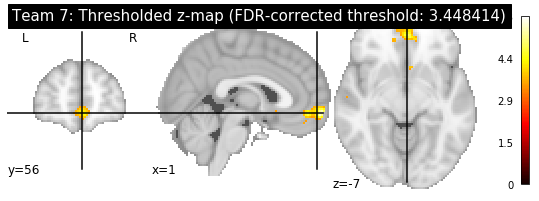

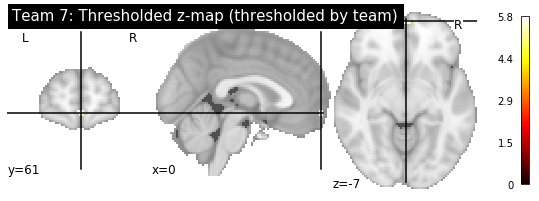

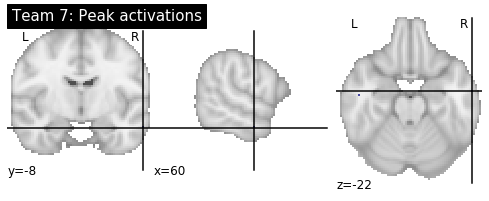

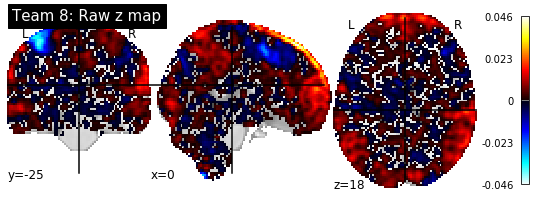

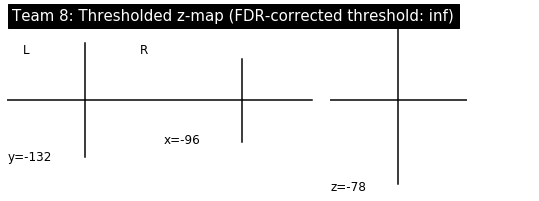

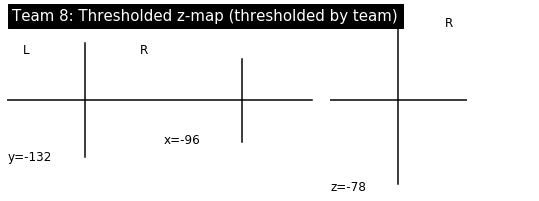

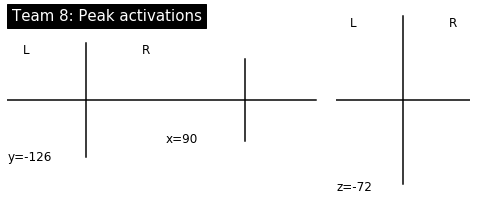

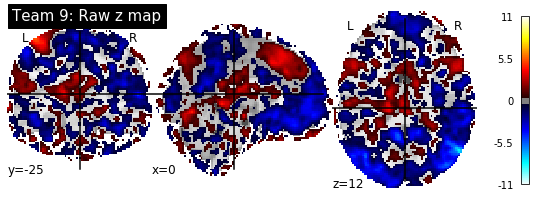

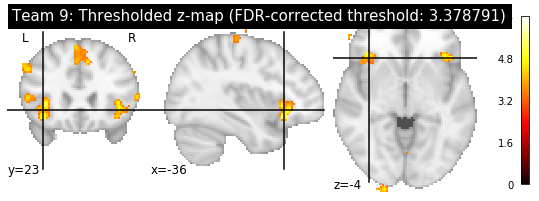

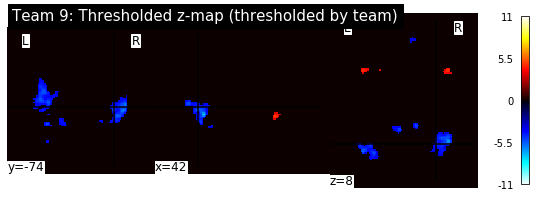

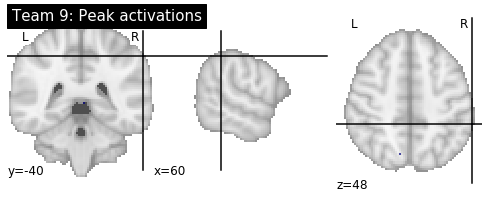

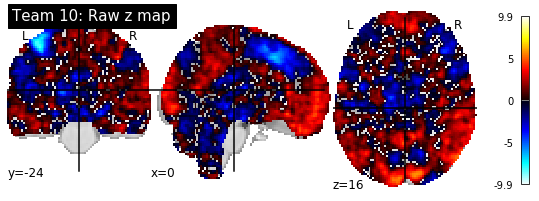

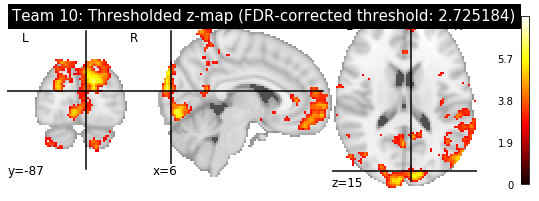

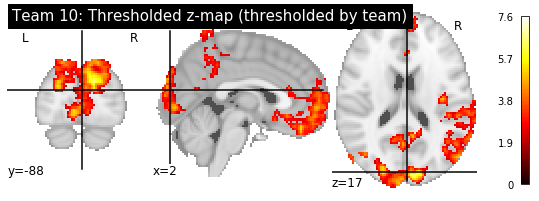

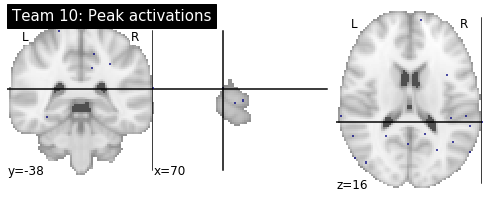

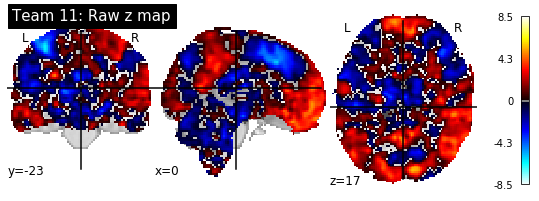

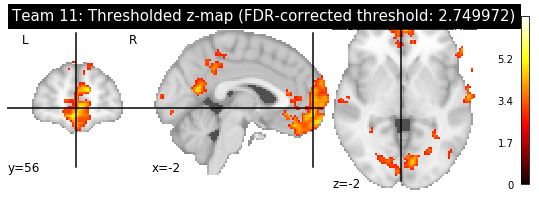

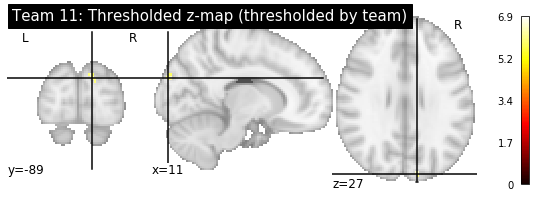

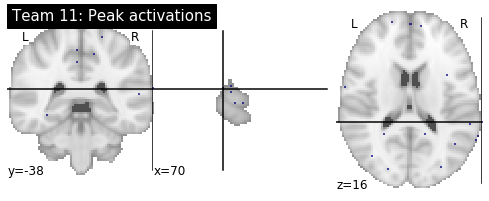

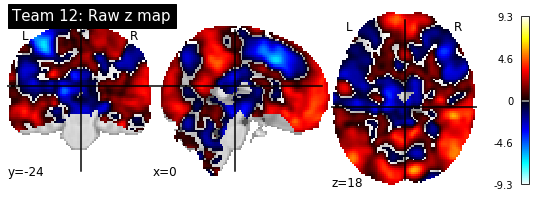

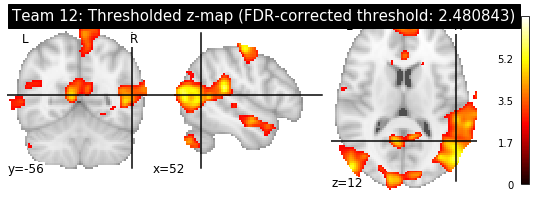

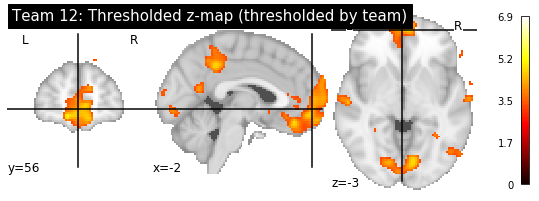

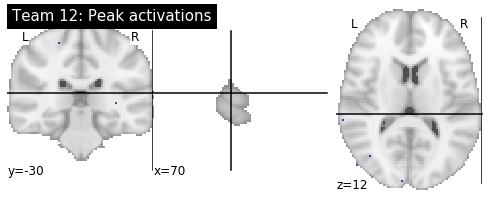

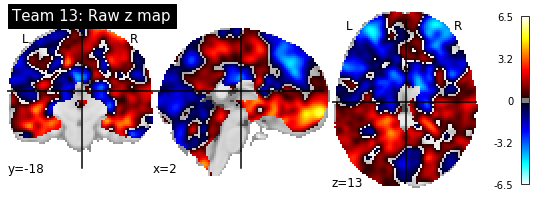

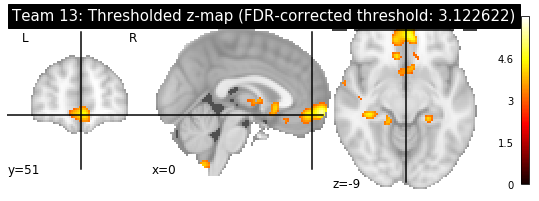

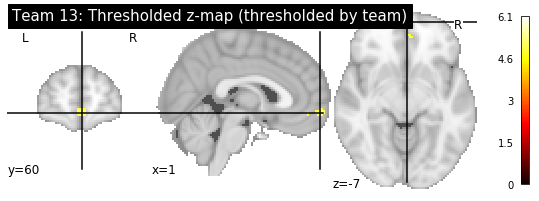

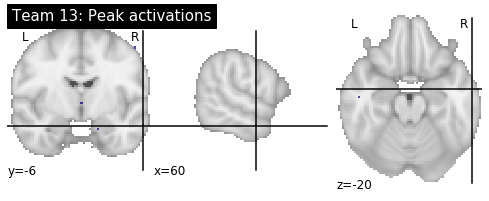

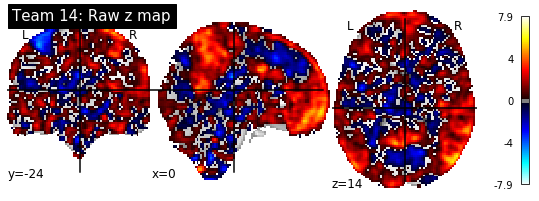

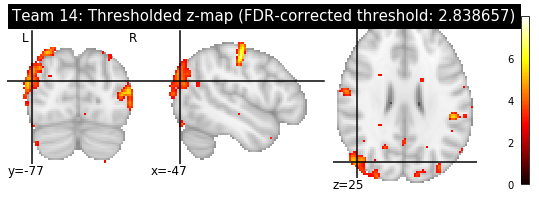

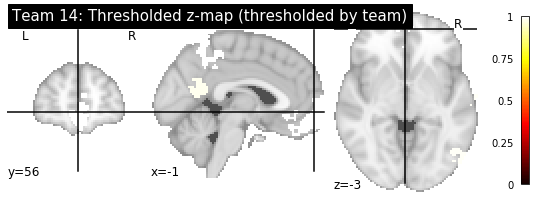

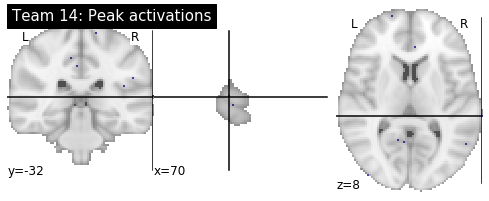

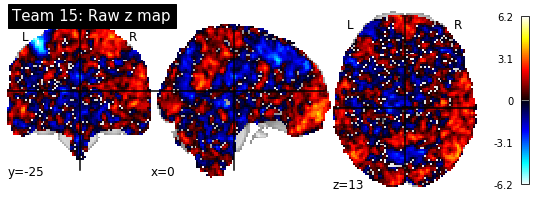

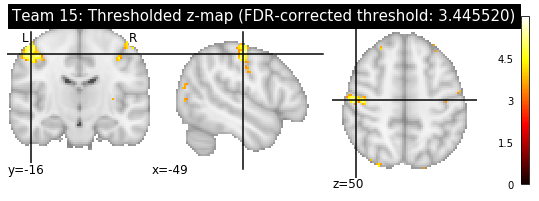

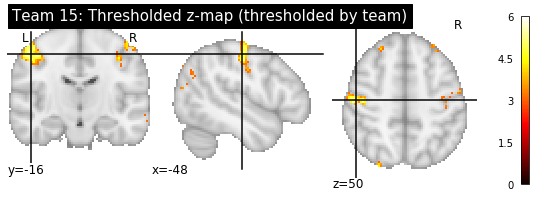

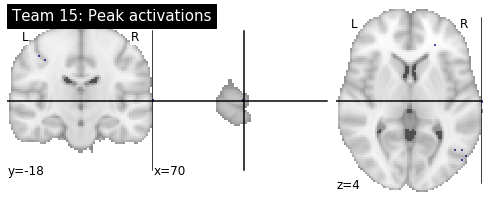

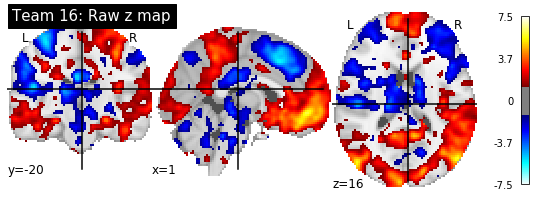

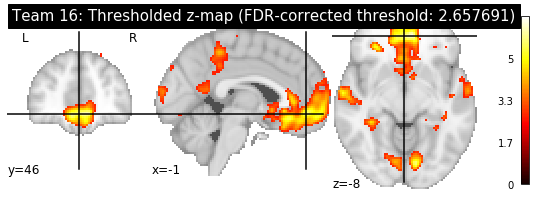

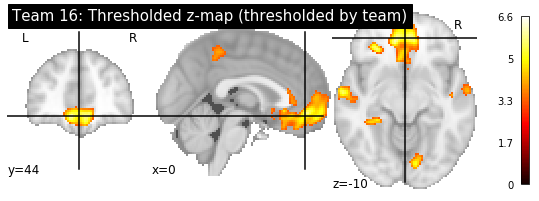

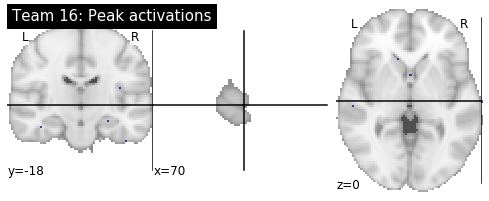

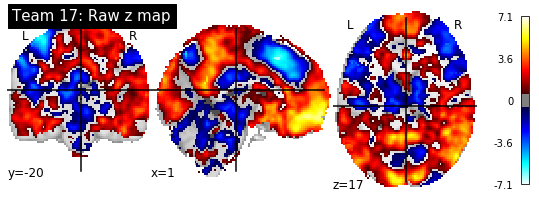

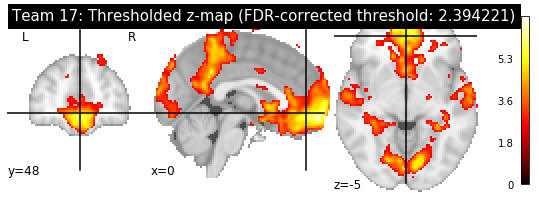

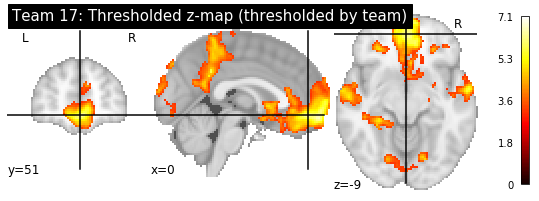

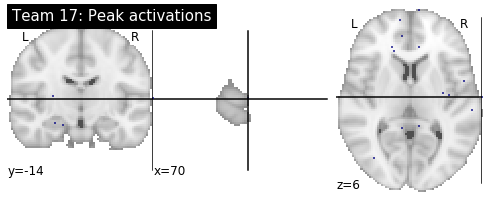

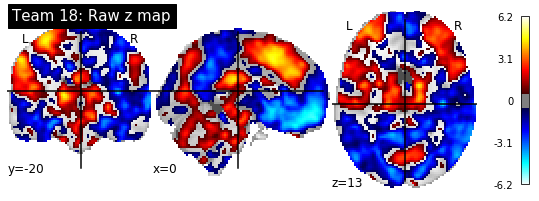

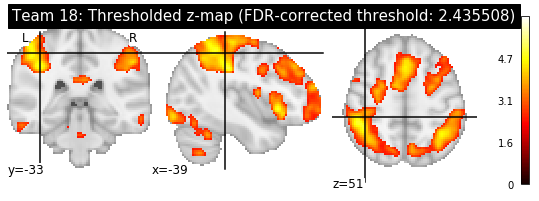

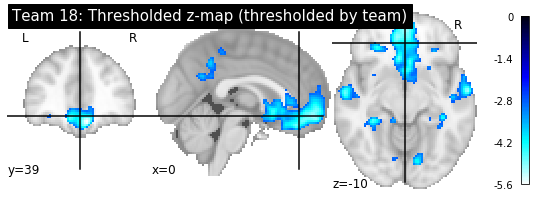

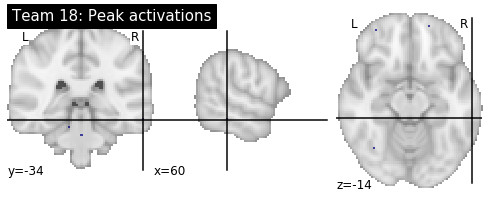

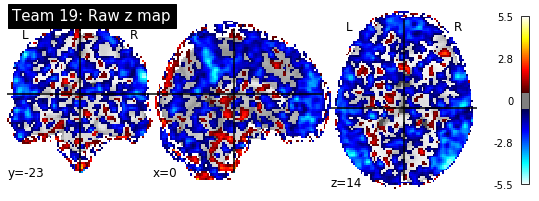

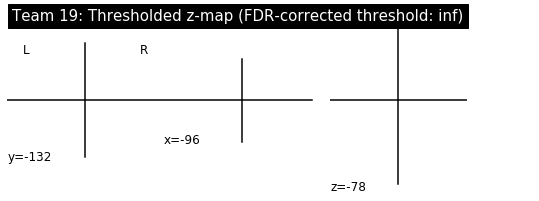

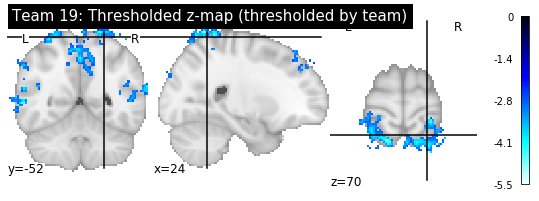

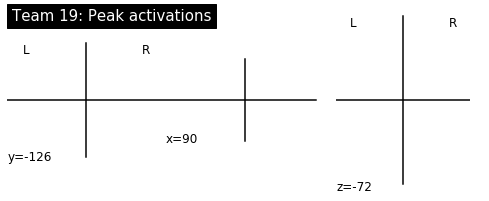

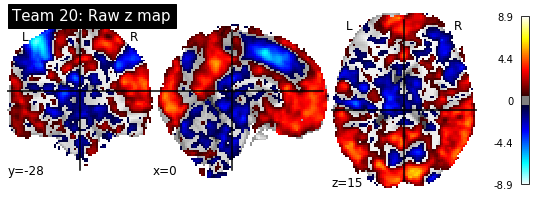

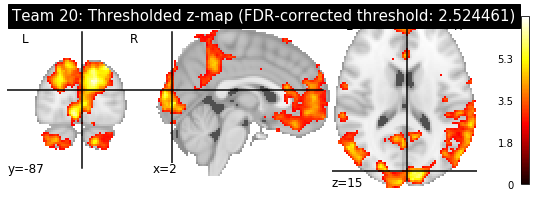

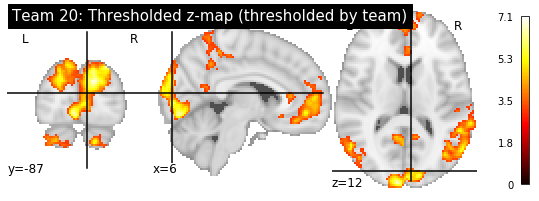

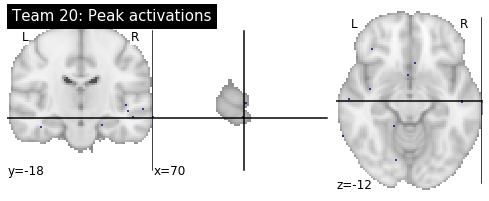

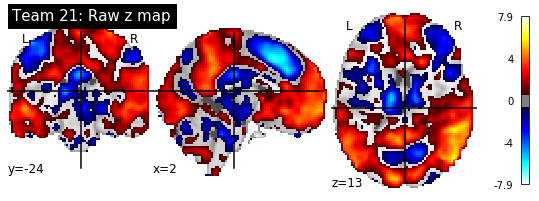

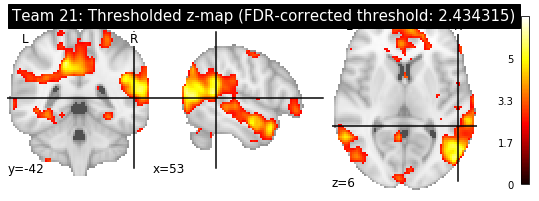

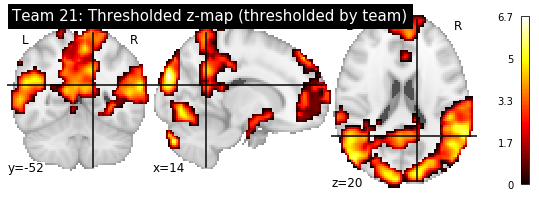

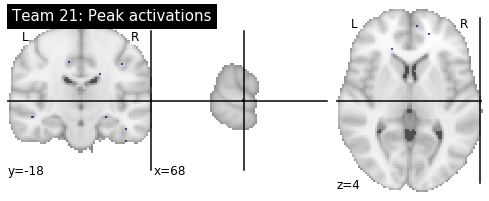

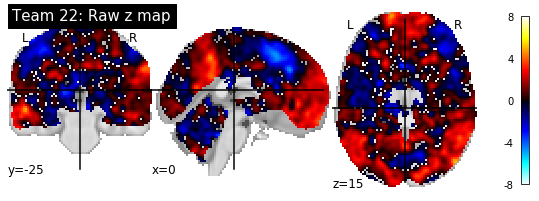

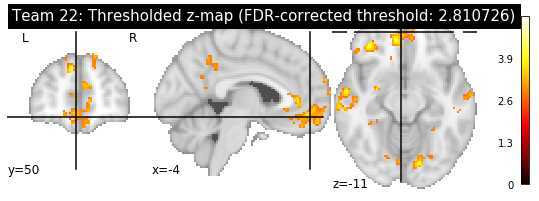

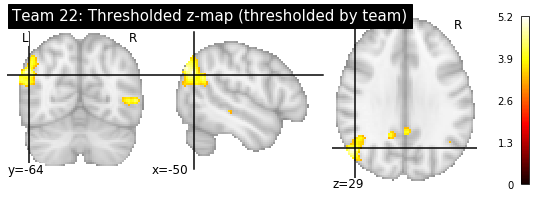

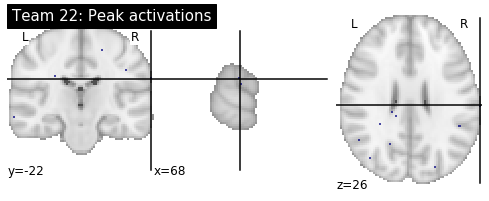

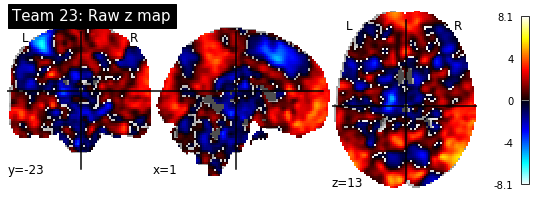

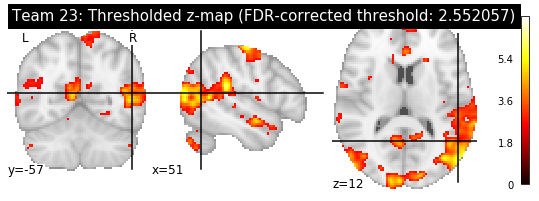

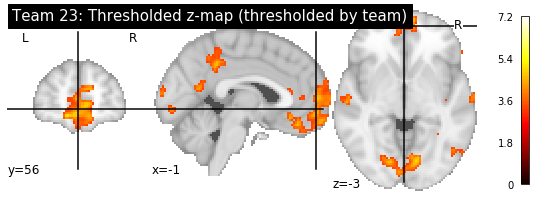

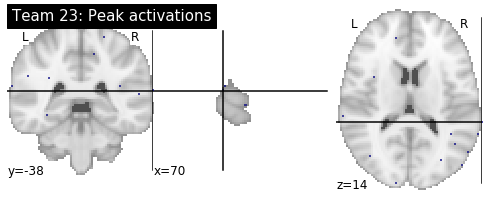

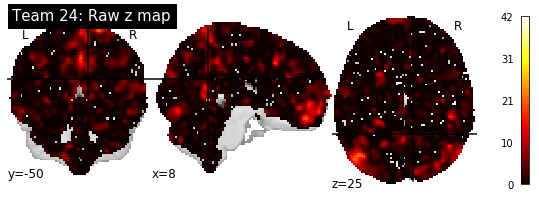

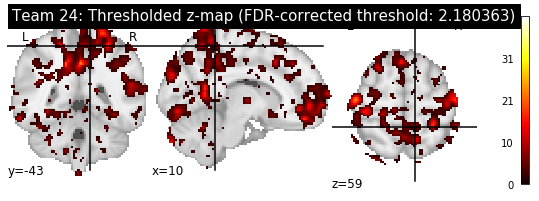

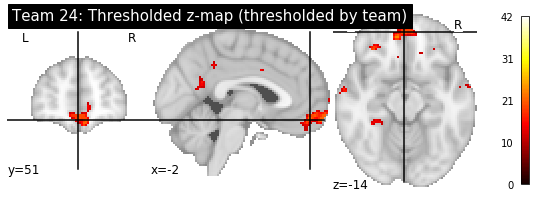

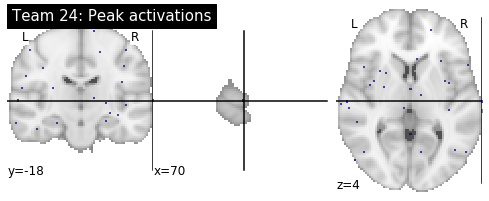

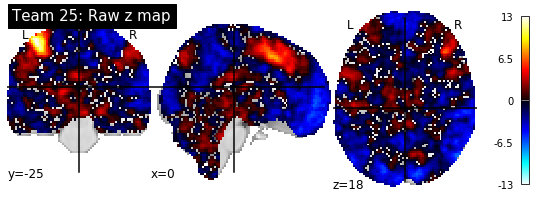

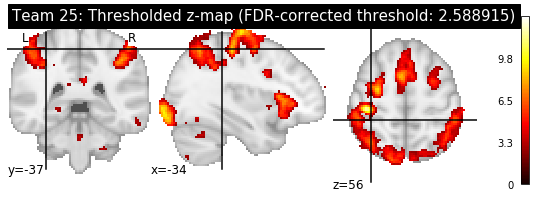

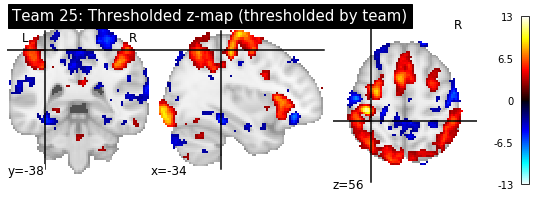

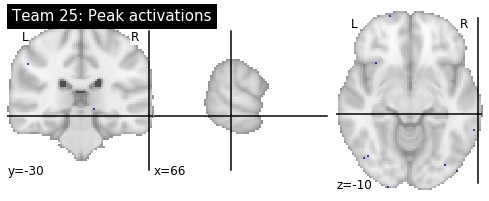

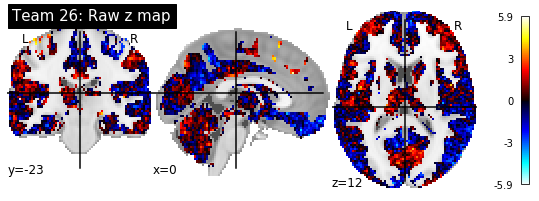

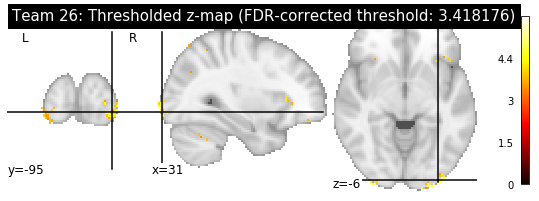

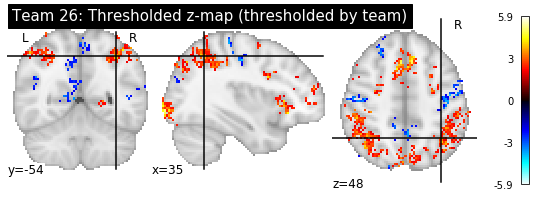

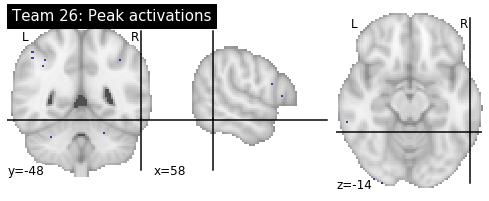

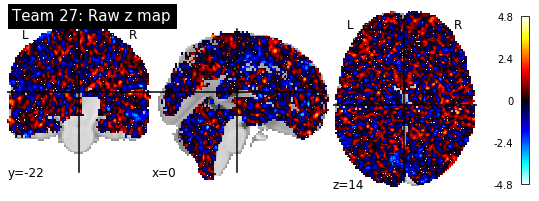

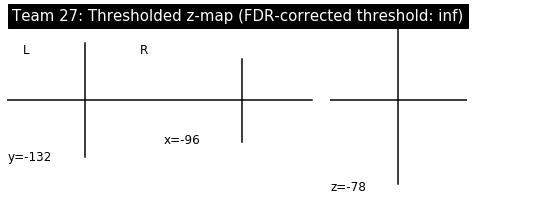

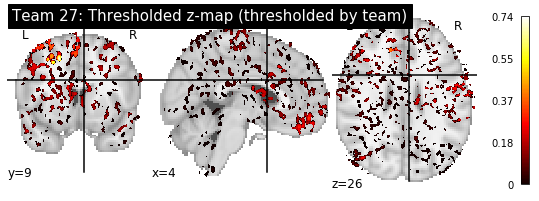

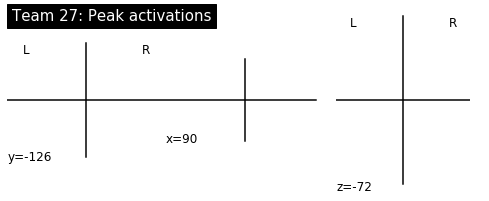

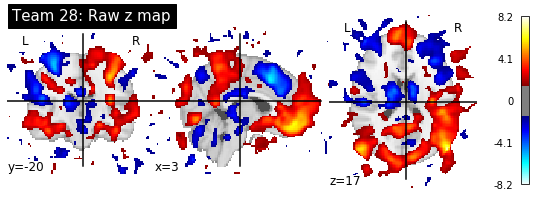

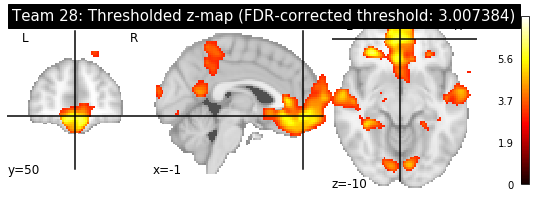

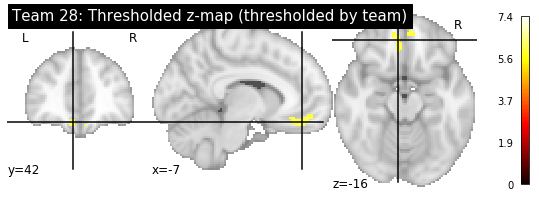

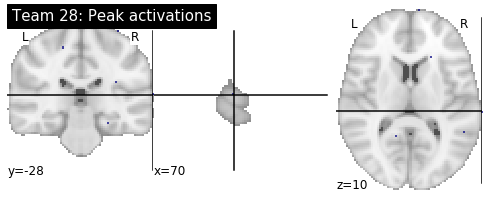

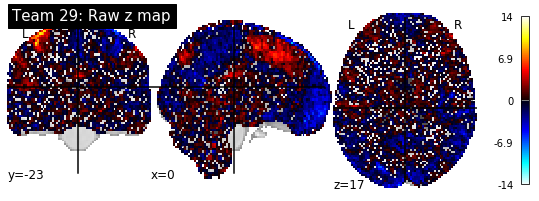

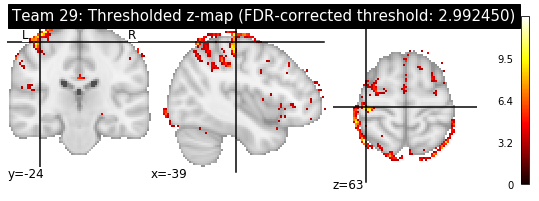

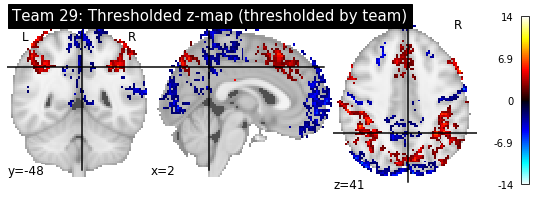

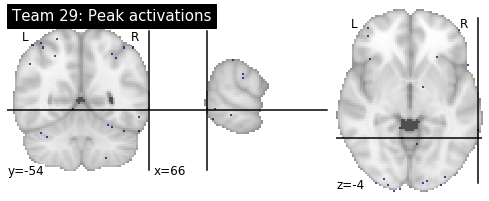

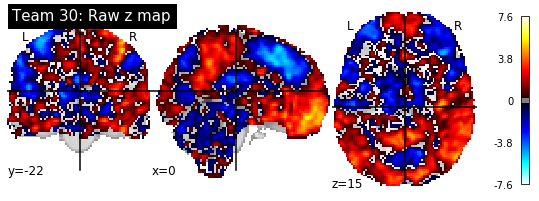

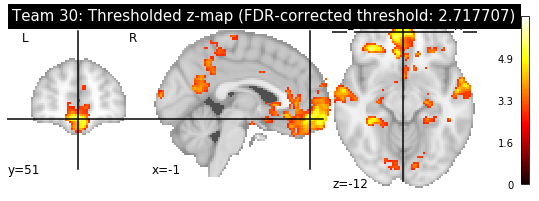

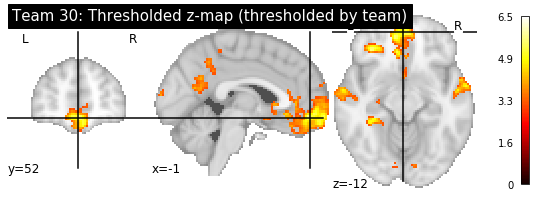

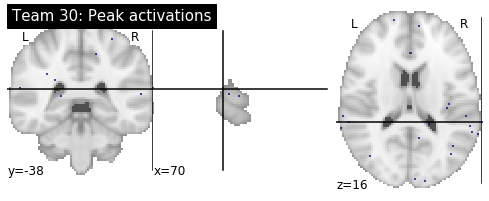

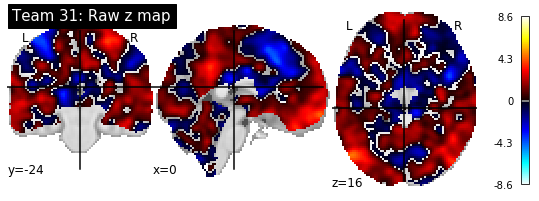

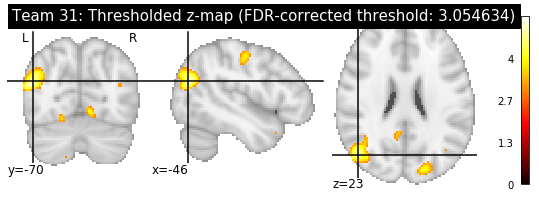

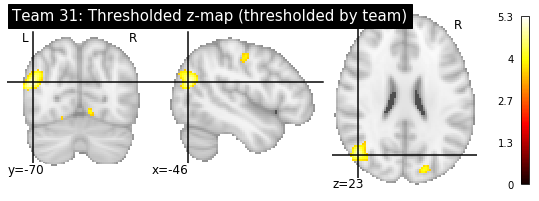

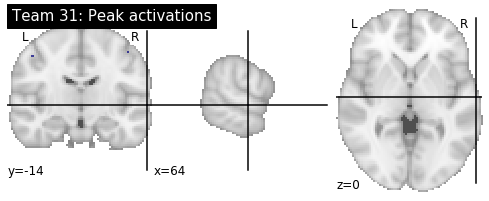

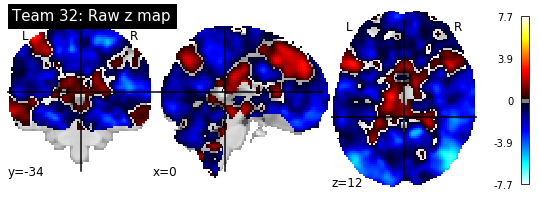

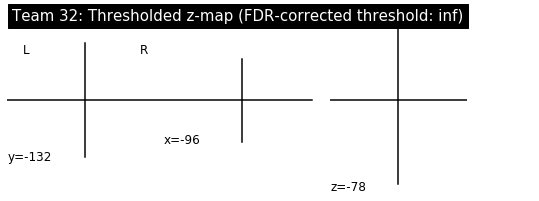

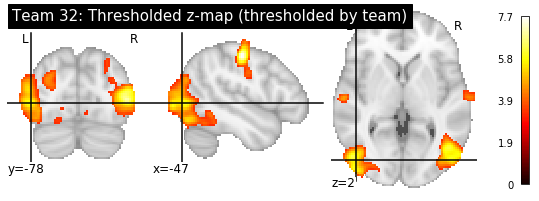

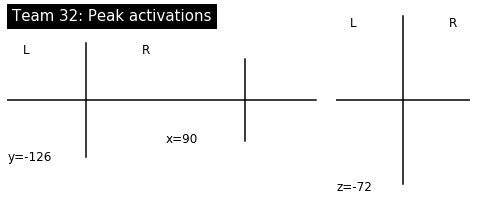

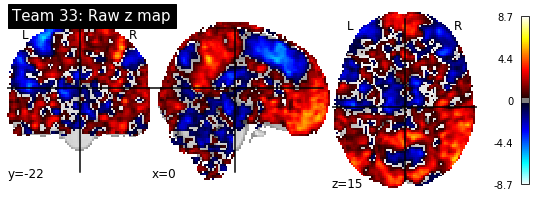

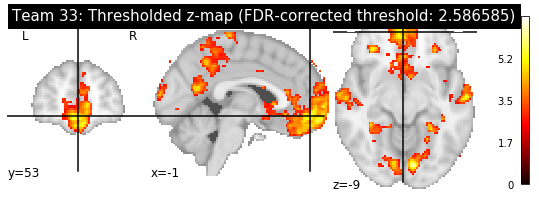

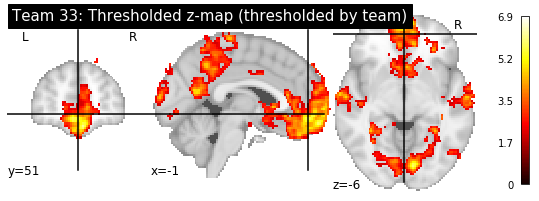

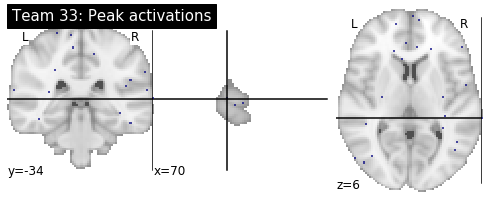

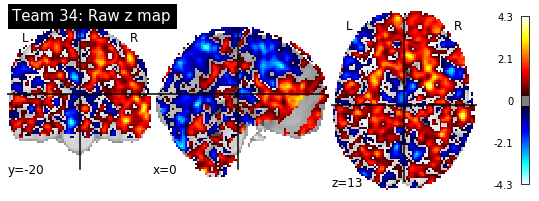

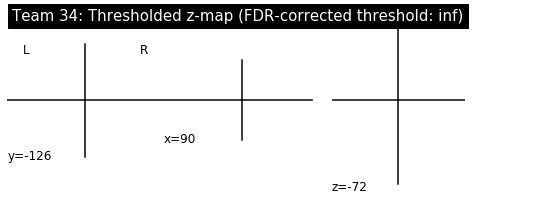

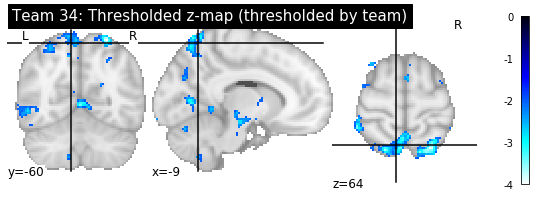

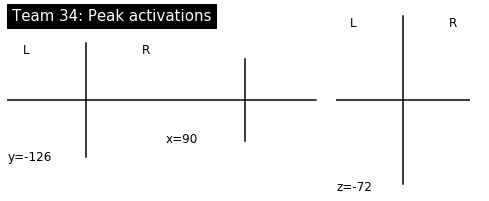

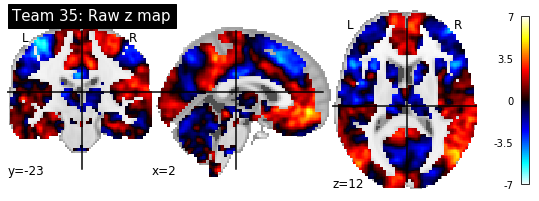

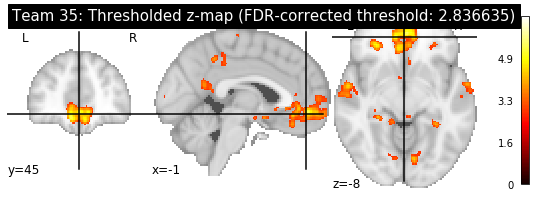

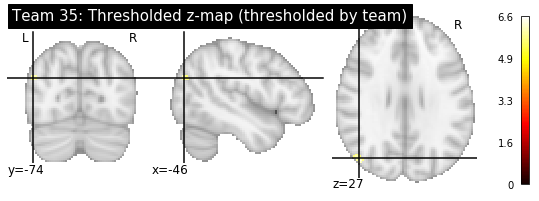

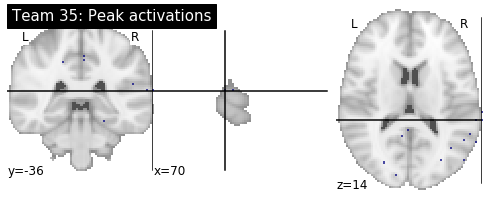

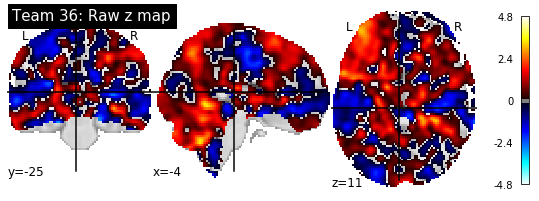

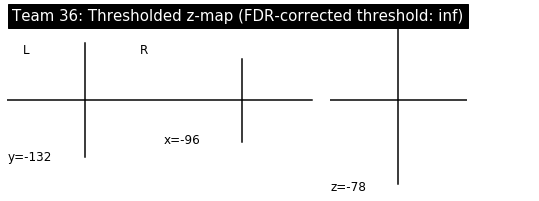

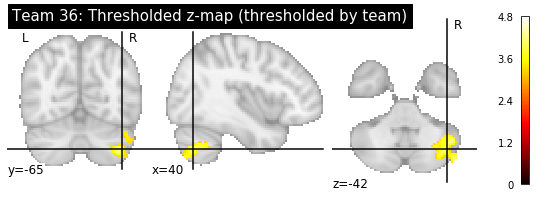

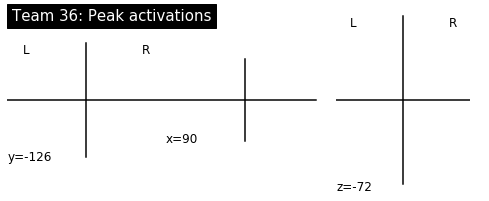

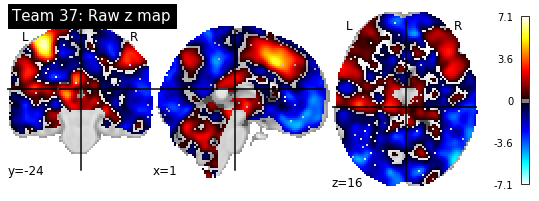

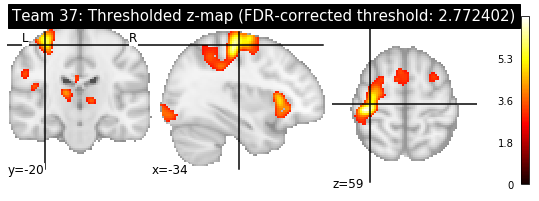

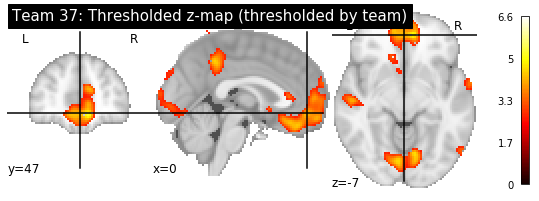

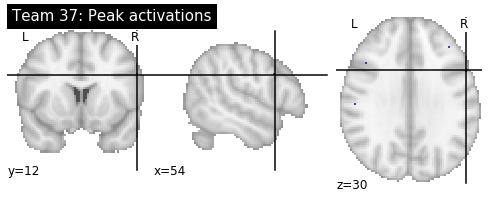

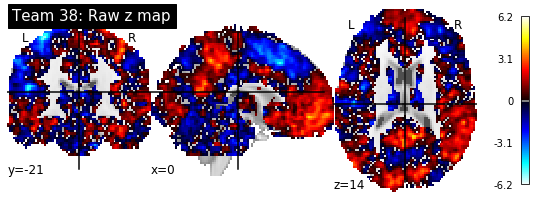

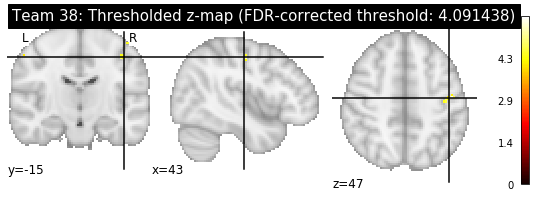

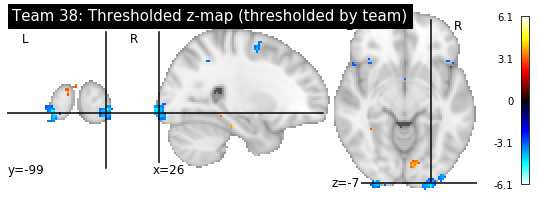

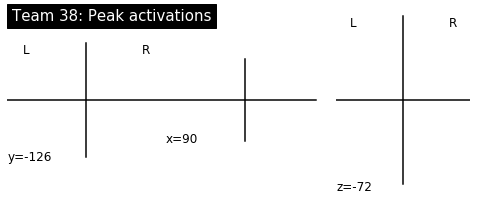

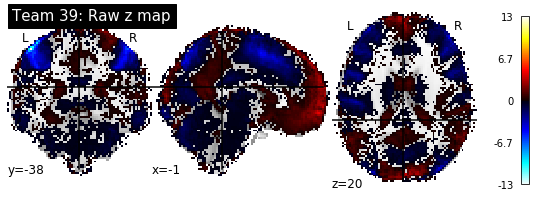

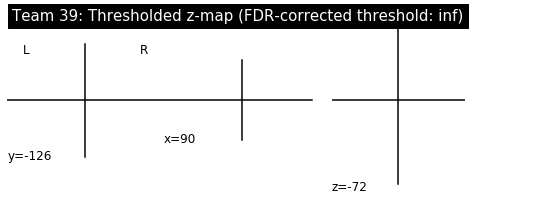

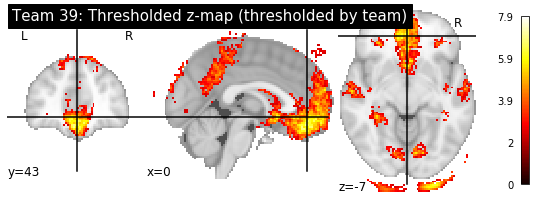

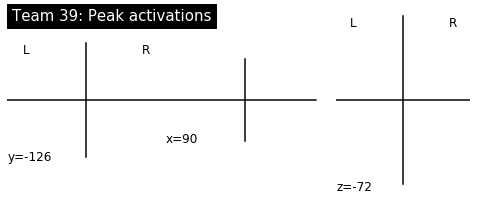

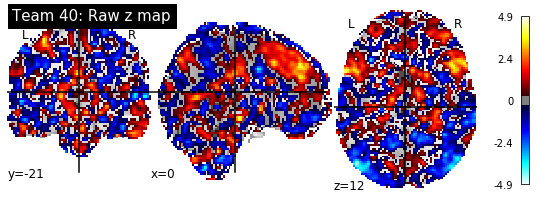

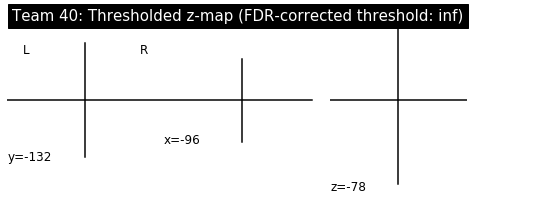

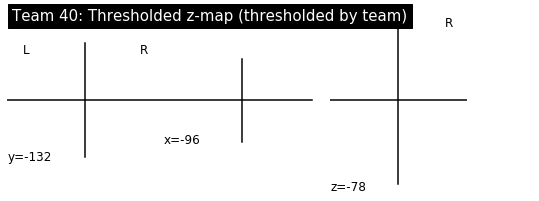

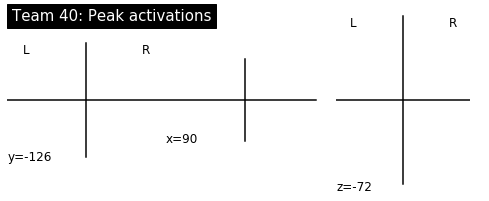

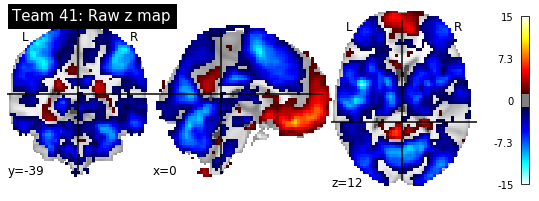

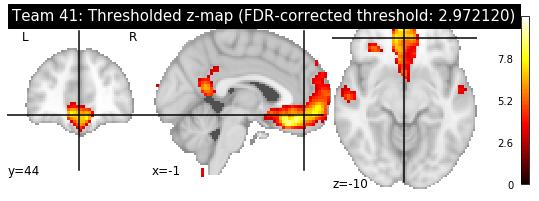

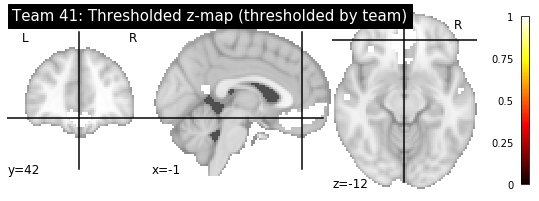

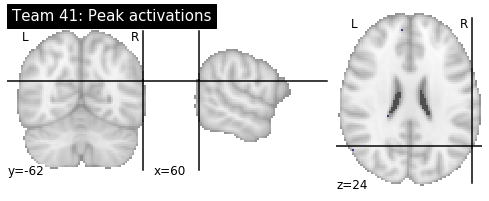

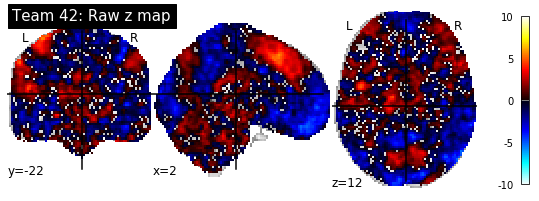

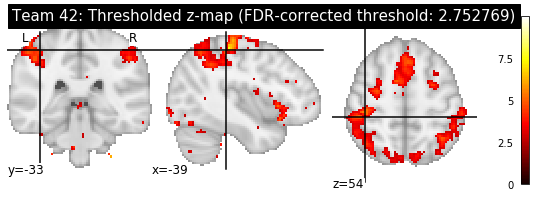

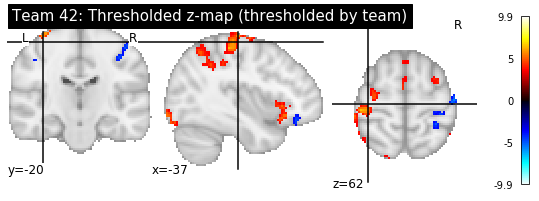

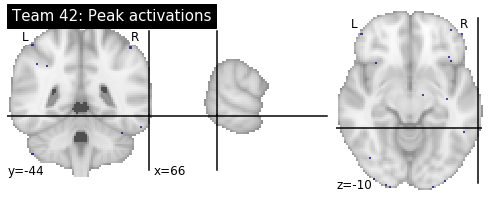

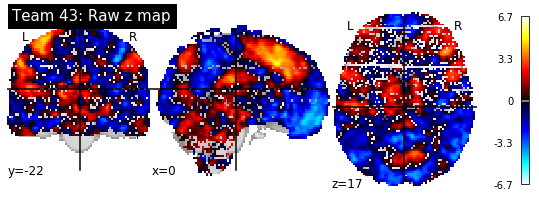

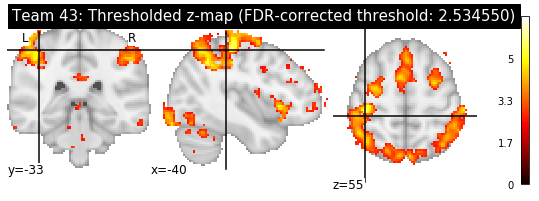

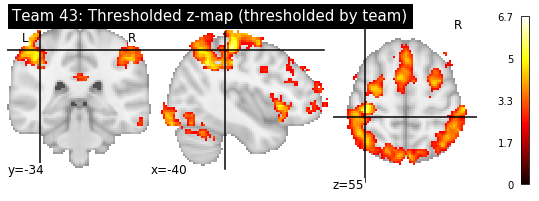

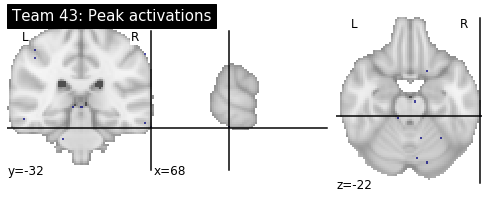

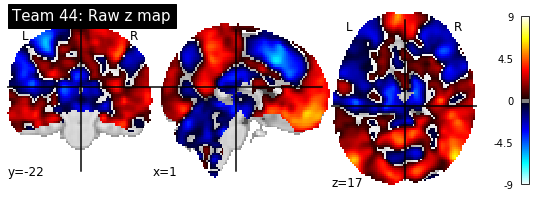

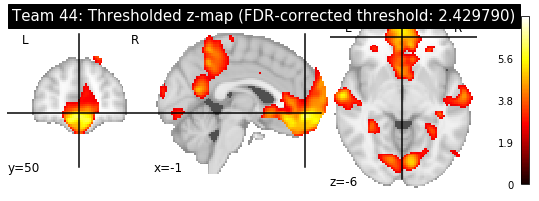

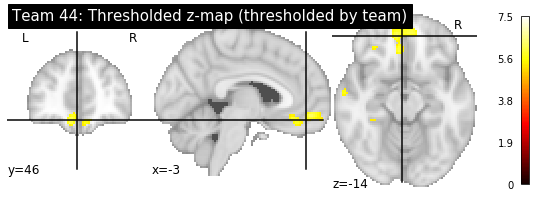

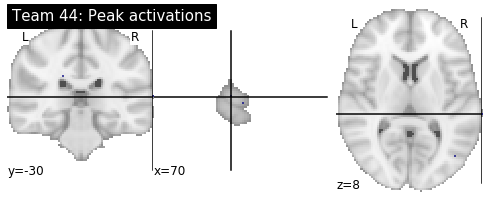

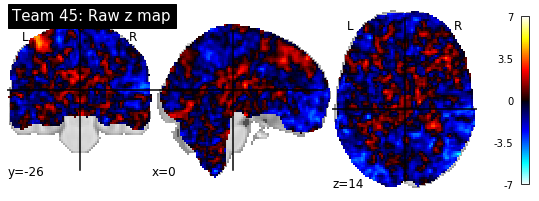

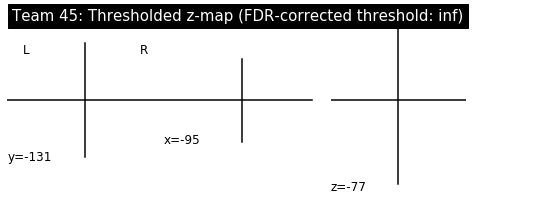

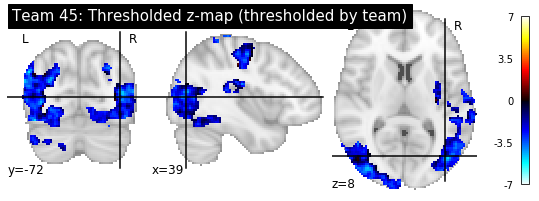

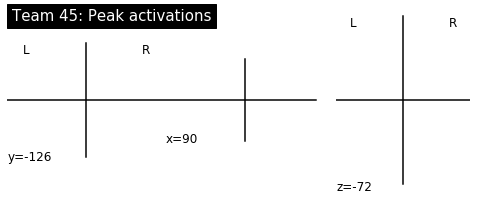

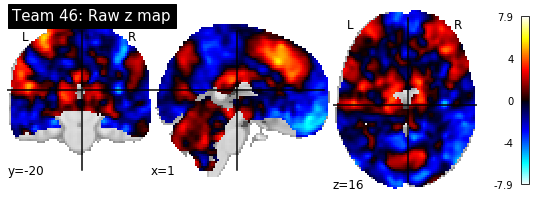

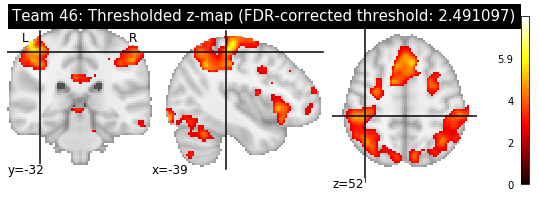

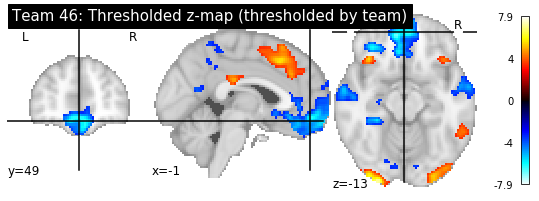

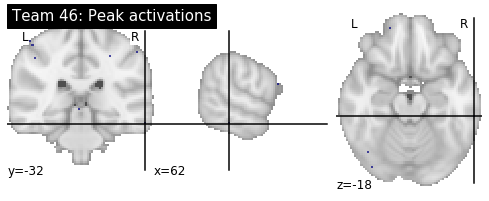

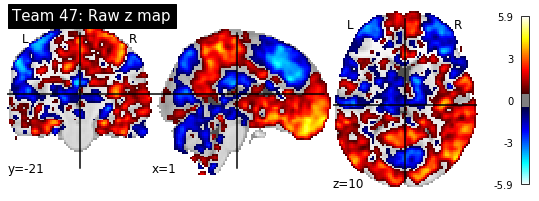

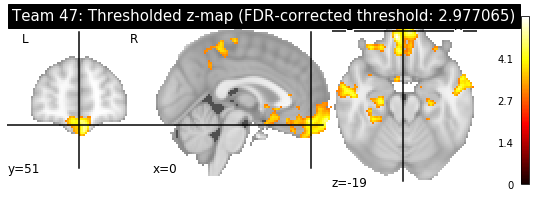

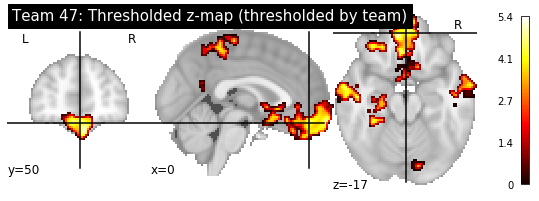

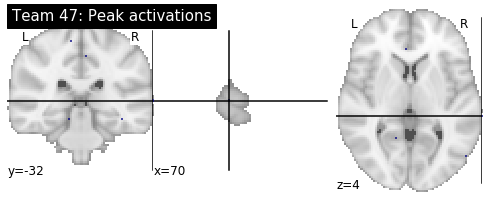

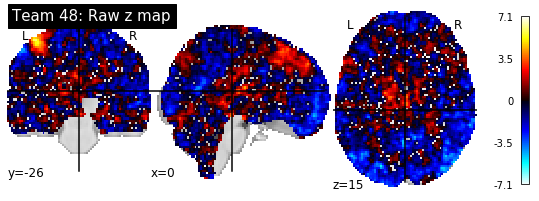

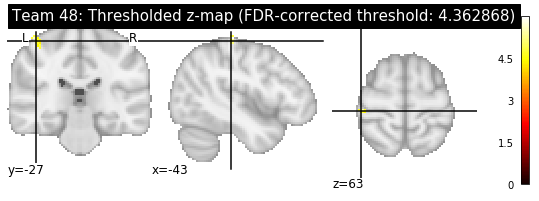

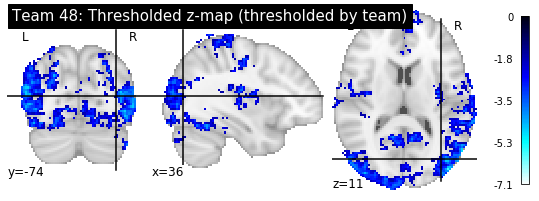

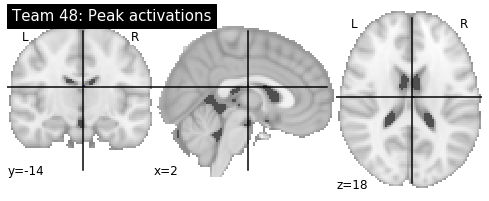

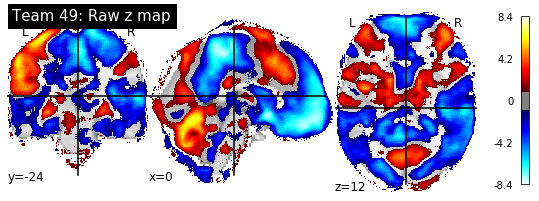

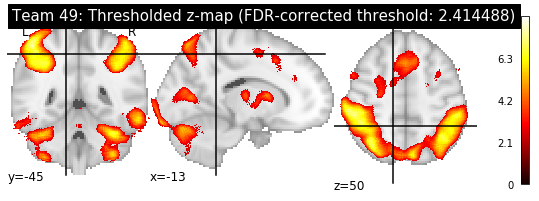

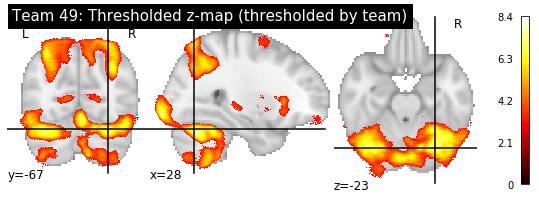

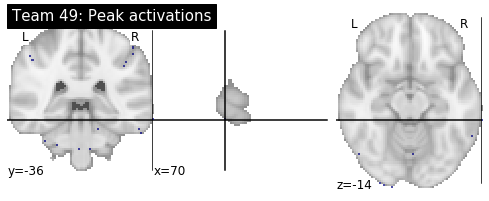

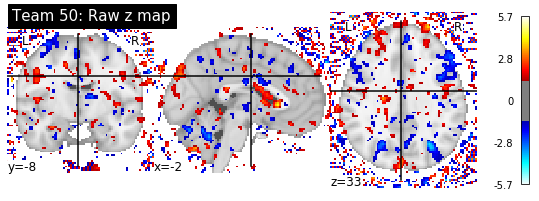

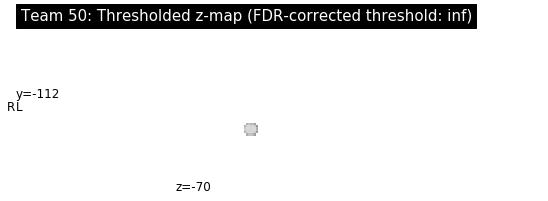

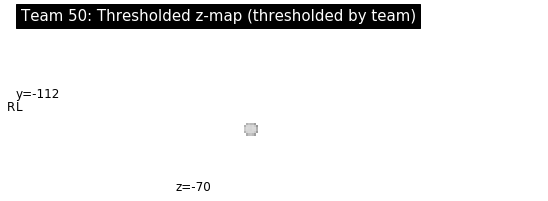

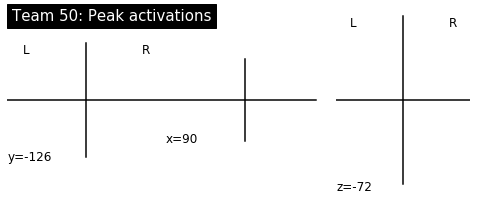

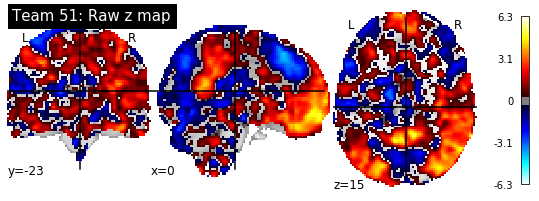

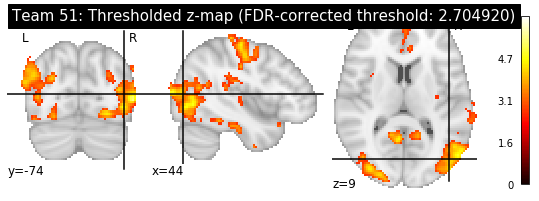

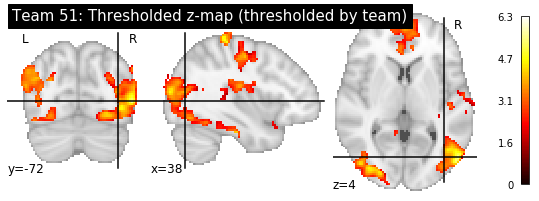

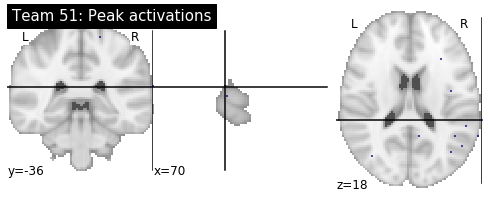

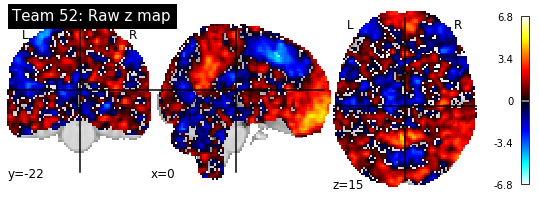

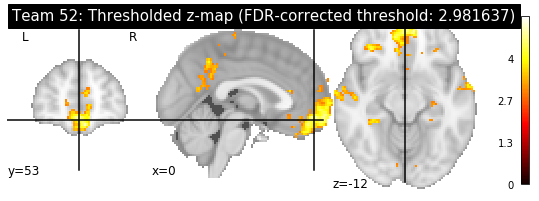

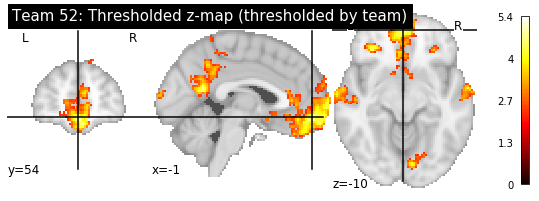

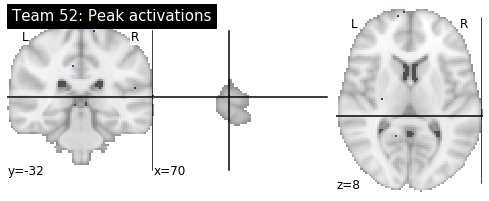

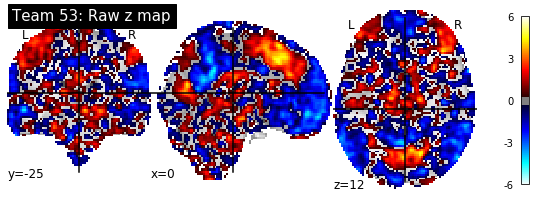

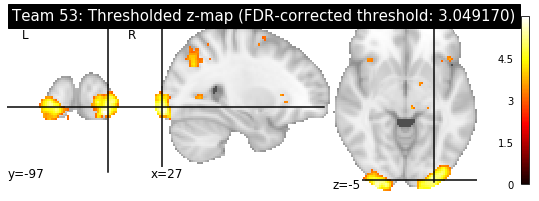

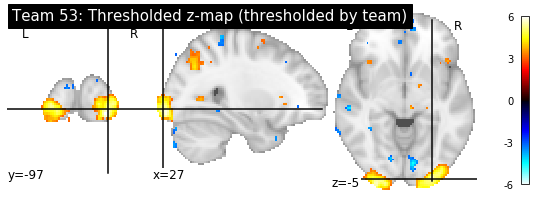

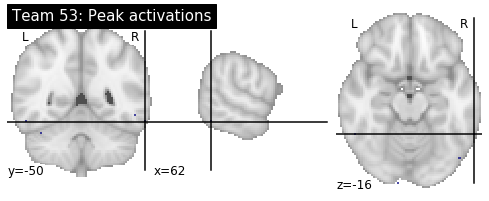

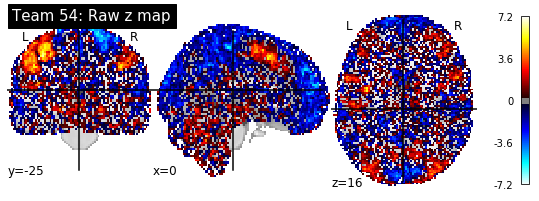

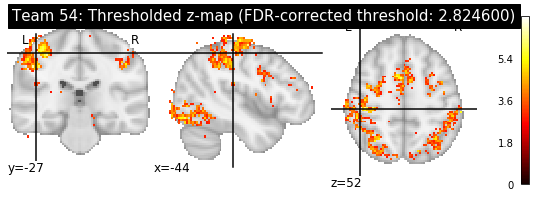

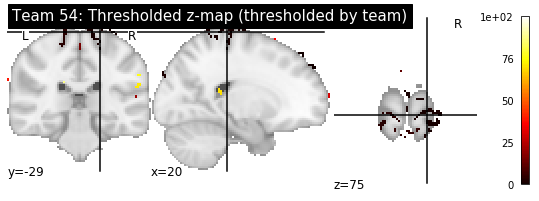

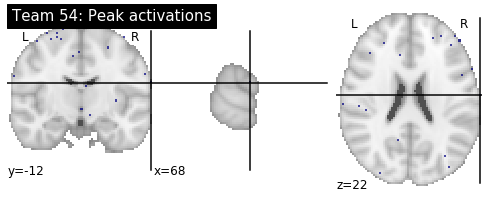

In [8]:
for n_study in range(len(img_paths)):
    # Raw z-map
    z_map = img_paths_unthresh[n_study]
    plotting.plot_stat_map(z_map, cut_coords=cut_coords, threshold='auto', \
                           title='Team %d: Raw z map' %(n_study+1))

    # Thresholded z-map (FDR-corrected)
    thresholded_map_me, threshold = thresholding.map_threshold(z_map, alpha=level, 
                       height_control=height_control, cluster_threshold=cluster_threshold)
                                                    
    plotting.plot_stat_map(thresholded_map_me, cut_coords=cut_coords,\
                           title='Team %d: Thresholded z-map (FDR-corrected threshold: %f)'\
                           %(n_study+1, fdr_thresholds[n_study]))   
    
    # Map thresholded by the analysis team
    thresholded_map_them = img_paths_thresh[n_study]
    plotting.plot_stat_map(thresholded_map_them, cut_coords=cut_coords,\
                           title='Team %d: Thresholded z-map (thresholded by team)'\
                           %(n_study+1))   
    
    # Peak activation map
    plotting.plot_roi(binary_peak_imgs[n_study], cut_coords=cut_coords,\
                      title='Team %d: Peak activations' %(n_study+1))
    